<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-электива:" data-toc-modified-id="Цель-электива:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель электива:</a></span></li><li><span><a href="#Используемые-библиотеки-и-инструменты" data-toc-modified-id="Используемые-библиотеки-и-инструменты-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Используемые библиотеки и инструменты</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Делаем-выгрузку-из-HeadHunter" data-toc-modified-id="Делаем-выгрузку-из-HeadHunter-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Делаем выгрузку из HeadHunter</a></span><ul class="toc-item"><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Загружаем данные</a></span></li><li><span><a href="#Напишем-цикл-для-направления-запросов-к-API-(в-3-этапа:-get,-json-и-перебор-страниц)" data-toc-modified-id="Напишем-цикл-для-направления-запросов-к-API-(в-3-этапа:-get,-json-и-перебор-страниц)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Напишем цикл для направления запросов к API (в 3 этапа: get, json и перебор страниц)</a></span></li></ul></li><li><span><a href="#Вытащим-ценную-информацию-из-словарей" data-toc-modified-id="Вытащим-ценную-информацию-из-словарей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вытащим ценную информацию из словарей</a></span></li><li><span><a href="#Про-дубликаты" data-toc-modified-id="Про-дубликаты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Про дубликаты</a></span></li><li><span><a href="#Посмотрим-компании,-предлагающие-вакансии,-а-также-города" data-toc-modified-id="Посмотрим-компании,-предлагающие-вакансии,-а-также-города-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Посмотрим компании, предлагающие вакансии, а также города</a></span></li><li><span><a href="#Что-с-зарплатой?" data-toc-modified-id="Что-с-зарплатой?-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Что с зарплатой?</a></span></li><li><span><a href="#Давайте-поищем-вакансии" data-toc-modified-id="Давайте-поищем-вакансии-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Давайте поищем вакансии</a></span></li><li><span><a href="#Посмотрим-содержание-вакансий" data-toc-modified-id="Посмотрим-содержание-вакансий-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Посмотрим содержание вакансий</a></span></li><li><span><a href="#Добавим-кнопки" data-toc-modified-id="Добавим-кнопки-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Добавим кнопки</a></span></li></ul></li></ul></div>

# Парсер HeadHunter

## Задача:
* Сделать парсер, чтобы получать те вакансии с HeadHunter, которые интересны именно мне

## Используемые библиотеки и инструменты
* requests - для отправки запросов к API HH
* pandas - для формирования таблицы 
* matplotlib, seaborn - визуализация
* json - формат обмена данными, будем использовать для декодирования ответов в удобном формате
* IPython - для магических штук
* BeautifulSoup - библиотека Python для извлечения данных из файлов HTML и XML

### Импорт библиотек

In [1]:
import os
import pandas as pd
import requests
import numpy as np

import json

from datetime import datetime, timedelta
import time
from IPython.core.display import display, HTML, clear_output
import ipywidgets as widgets
from typing import Union

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50) #устанавливаем максимальное число отображаемых колонок
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 1)


In [2]:
print (pd.__version__) #проверка версии Pandas

1.3.4


### Делаем выгрузку из HeadHunter
Ссылка на API HH: https://github.com/hhru/api \
Для того, чтобы написать запрос используется язык поисковых запросов, задокументированный тут: https://hh.ru/article/1175 \
Фильтрацию можно делать в самом запросе, например, сделать поиск по полю компаний или же по наличию конкретного текста в описании, где COMPANY_NAME - название компании, а DESCRIPTION - описание вакансии. Язык запросов работает и на обычном сайте hh.ru, что бывает полезно.

Создадим необходимые константы: BASE_URL

#### Загружаем данные

Найдем вакансии "Аналитика" и исключим вакансии со словами Системный, Разработчик, System

In [3]:
BASE_URL = "https://api.hh.ru/" 

#TEXT = f'NAME:("Machine Learning Engineer" OR "Data Scientist" OR "Дата саентист" OR "Machine Learning Developer" or "Machine Learning Researcher" or "Искусственный интеллект" or "Машинное обучение" or "Специалист по machine learning" or "Специалист по машинному обучению" or "AI engineer" or "Разработчик ML" or "Data Science" or "Machine Learning" or "Artificial Intelligence" or "ML Engineer" or "Аналитик" or "Analyst" or "Data Engineer" or "DWH" or "BI" or "Business Intelligence" or "Data инженер" or "Инженер данных" or "ETL" or "КХД")'
TEXT = f'SQL NAME:(("Аналитик" OR "Analyst" OR "Аналитик SQL" OR "BI" OR "Tableau") NOT "Системный" NOT Разработчик NOT System)'

dt_now = datetime.now().date()
dt_from = dt_now - timedelta(days=3) 
DATE_TO = dt_now.isoformat() #API требует дату в формате ISO 8601 YYYY-MM-DD или YYYY-MM-DDThh:mm:ss±hhmm
DATE_FROM = dt_from.isoformat()

VAC_URL = BASE_URL + f'vacancies?text={TEXT}&date_from={DATE_FROM}&date_to={DATE_TO}&responses_count_enabled=True&per_page=100'

In [4]:
VAC_URL

'https://api.hh.ru/vacancies?text=SQL NAME:(("Аналитик" OR "Analyst" OR "Аналитик SQL" OR "BI" OR "Tableau") NOT "Системный" NOT Разработчик NOT System)&date_from=2022-08-21&date_to=2022-08-24&responses_count_enabled=True&per_page=100'

In [5]:
vacancy_df = pd.DataFrame() # создаем датафрейм в который будем сохранять наши данные

В выдаче API HH нет опыта работы, поэтому мы укажем его в запросе самостоятельно:\
Можно выбрать подходящий. Важно помнить, что можно откликаться на вакансии «от 1 года опыта» :)

In [6]:
experiences = ['noExperience',
               'between1And3',
               'between3And6', 
               'moreThan6']

#### Напишем цикл для направления запросов к API (в 3 этапа: get, json и перебор страниц)

In [7]:
for exp in experiences:
    page = 0
    url = VAC_URL + f'&experience={exp}'
    try:
        r = requests.get(url + f'&page={page}')
        data = json.loads(r.text)
        print(exp, ' - ', data['pages'])
        items = data['items']
        for page in range(1, data['pages']):
            r = requests.get(url + f'&page={page}')
            data = json.loads(r.text)
            items += data['items']
        df = pd.DataFrame(items)
        df['experience'] = exp
        vacancy_df = pd.concat([vacancy_df, df])
    except Exception as e:
        print(exp, ' - ', e)
        time.sleep(10)

noExperience  -  1
between1And3  -  5
between3And6  -  3
moreThan6  -  1


In [8]:
vacancy_df.reset_index(drop=True, inplace=True)

In [9]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        776 non-null    object
 1   premium                   776 non-null    bool  
 2   name                      776 non-null    object
 3   department                99 non-null     object
 4   has_test                  776 non-null    bool  
 5   response_letter_required  776 non-null    bool  
 6   area                      776 non-null    object
 7   salary                    169 non-null    object
 8   type                      776 non-null    object
 9   address                   450 non-null    object
 10  response_url              0 non-null      object
 11  sort_point_distance       0 non-null      object
 12  published_at              776 non-null    object
 13  created_at                776 non-null    object
 14  archived                  

### Вытащим ценную информацию из словарей

Напишем функцию

In [10]:
def return_id(x, key='id', nan_value=np.nan):
    try:
        return x[key]
    except Exception as e:
        return nan_value

Вытащим желаемые данные

In [11]:
vacancy_df['employer_name'] = vacancy_df['employer'].apply(return_id, key='name')
vacancy_df['department_name'] = vacancy_df['department'].apply(return_id, key='name')
vacancy_df['salary_from'] = vacancy_df['salary'].apply(return_id, key='from')
vacancy_df['salary_to'] = vacancy_df['salary'].apply(return_id, key='to')
vacancy_df['salary_gross'] = vacancy_df['salary'].apply(return_id, key='gross')
vacancy_df['salary_currency'] = vacancy_df['salary'].apply(return_id, key='currency')
vacancy_df['responses'] = vacancy_df['counters'].apply(return_id, key='responses')
vacancy_df['city'] = vacancy_df['area'].apply(return_id, key='name')

# станция метро
vacancy_df['metro'] = vacancy_df['address'].apply(return_id, key='metro').apply(return_id, key='station_name')

#vacancy_df['metro_station_name'] = vacancy_df['metro'].apply(return_id, key='station_name')
#vacancy_df.drop(columns = ['metro'],axis = 1)

In [12]:
vacancy_df['published_at'] = pd.to_datetime(vacancy_df['published_at'], format = '%Y-%m-%d %H:%M:%S').dt.tz_convert(None)

In [13]:
vacancy_df['published_at'] = vacancy_df['published_at'].astype('datetime64[D]')

In [14]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        776 non-null    object        
 1   premium                   776 non-null    bool          
 2   name                      776 non-null    object        
 3   department                99 non-null     object        
 4   has_test                  776 non-null    bool          
 5   response_letter_required  776 non-null    bool          
 6   area                      776 non-null    object        
 7   salary                    169 non-null    object        
 8   type                      776 non-null    object        
 9   address                   450 non-null    object        
 10  response_url              0 non-null      object        
 11  sort_point_distance       0 non-null      object        
 12  published_at          

In [15]:
vacancy_df.head(3)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,adv_response_url,alternate_url,relations,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,responses,city,metro
0,69141517,False,Аналитик данных,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Алтуфьевское шоссе', 'building': '27', 'description': None, 'lat': 55.857503, 'lng': 37.583203, 'raw': 'Москва, Алтуфьевское шоссе, 27', 'metro': None, 'metro_stations': [], 'id': '4551065'}",None,None,2022-08-24,2022-08-24T16:23:42+0300,False,https://hh.ru/applicant/vacancy_response?vacancyId=69141517,None,https://api.hh.ru/vacancies/69141517?host=hh.ru,https://api.hh.ru/vacancies/69141517/adv_response?host=hh.ru,https://hh.ru/vacancy/69141517,[],"{'id': '4968470', 'name': 'МКК Всегда в плюсе', 'url': 'https://api.hh.ru/employers/4968470', 'alternate_url': 'https://hh.ru/employer/4968470', 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/5526481.png', '90': 'https://hhcdn.ru/employer-logo/5526480.png', 'original': 'https://hhcdn.ru/employer-logo-original/976410.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=4968470', 'trusted': True}","{'requirement': 'Знание PostgreSQL. Навыки разработки отчетов/дашбордов средствами Power BI или Excel. Как преимущество: Знание ETL/ELT, принципы построения DWH. ', 'responsibility': 'Ad-hoc запросы. Разработка и построение дашбордов для BI <highlighttext>аналитики</highlighttext> (Power BI). Создание витрин в хранилище. Анализ структуры различных источников...'}",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 1},[],[],[],False,noExperience,МКК Всегда в плюсе,NaN,NaN,NaN,NaN,NaN,1,Москва,NaN
1,39904397,False,Продуктовый аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Головинское шоссе', 'building': '5', 'description': None, 'lat': 55.84024, 'lng': 37.492024, 'raw': 'Москва, Головинское шоссе, 5', 'metro': {'station_name': 'Водный стадион', 'line_name': 'Замоскворецкая', 'station_id': '2.29', 'line_id': '2', 'lat': 55.838978, 'lng': 37.487515}, 'metro_stations': [{'station_name': 'Водный стадион', 'line_name': 'Замоскворецкая', 'station_id': '2.29', 'line_id': '2', 'lat': 55.838978, 'lng': 37.487515}], 'id': '643441'}",None,None,2022-08-24,2022-08-24T14:52:54+0300,False,https://hh.ru/applicant/vacancy_response?vacancyId=39904397,None,https://api.hh.ru/vacancies/39904397?host=hh.ru,https://api.hh.ru/vacancies/39904397/adv_response?host=hh.ru,https://hh.ru/vacancy/39904397,[],"{'id': '78638', 'name': 'Тинькофф', 'url': 'https://api.hh.ru/employers/78638', 'alternate_url': 'https://hh.ru/employer/78638', 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3452962.png', '90': 'https://hhcdn.ru/employer-logo/3452961.png', 'original': 'https://hhcdn.ru/employer-logo-original/753000.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=78638', 'trusted': True}","{'requirement': 'Умение аргументированно отстаивать свою точку зрения. Опыт работы хотя бы с одним из языков программирования (базовые алгоритмы) или знание <highlighttext>SQL</highlighttext>.', 'responsibility': '...гипотез по развитию проектов. Проектировать модель данных и ключевую отчетность на направлении. Самостоятельно выявлять и закрывать потребность команды в <highlighttext>аналитике</highlighttext>.'}",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 4},[],[],[],False,noExperience,Тинькофф,NaN,NaN,NaN,NaN,NaN,4,Москва,Водный стадион
2,69135650,False,Контролер-аналитик,None,False,False,"{'id': '1', 'name': 'Москва'

In [16]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        776 non-null    object        
 1   premium                   776 non-null    bool          
 2   name                      776 non-null    object        
 3   department                99 non-null     object        
 4   has_test                  776 non-null    bool          
 5   response_letter_required  776 non-null    bool          
 6   area                      776 non-null    object        
 7   salary                    169 non-null    object        
 8   type                      776 non-null    object        
 9   address                   450 non-null    object        
 10  response_url              0 non-null      object        
 11  sort_point_distance       0 non-null      object        
 12  published_at          

In [17]:
vacancy_df['name'].value_counts().head(30)

Аналитик                                        56
Бизнес-аналитик                                 44
Аналитик данных                                 21
Data Analyst                                    14
Финансовый аналитик                             13
Продуктовый аналитик                            9 
Инженер сопровождения продукта / Аналитик BI    8 
Аналитик BI                                     8 
Data analyst                                    8 
BI аналитик                                     6 
Бизнес-аналитик 1С                              5 
Старший аналитик                                5 
Маркетинговый аналитик                          5 
Product Analyst                                 5 
Аналитик SQL                                    5 
Аналитик 1С УХ/1С ERP                           5 
Маркетолог-аналитик                             5 
Product analyst                                 4 
Ведущий бизнес-аналитик                         4 
Аналитик бизнес-процессов      

In [18]:
vacancy_df

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,adv_response_url,alternate_url,relations,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,responses,city,metro
0,69141517,False,Аналитик данных,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Алтуфьевское шоссе', 'building': '27', 'description': None, 'lat': 55.857503, 'lng': 37.583203, 'raw': 'Москва, Алтуфьевское шоссе, 27', 'metro': None, 'metro_stations': [], 'id': '4551065'}",None,None,2022-08-24,2022-08-24T16:23:42+0300,False,https://hh.ru/applicant/vacancy_response?vacancyId=69141517,None,https://api.hh.ru/vacancies/69141517?host=hh.ru,https://api.hh.ru/vacancies/69141517/adv_response?host=hh.ru,https://hh.ru/vacancy/69141517,[],"{'id': '4968470', 'name': 'МКК Всегда в плюсе', 'url': 'https://api.hh.ru/employers/4968470', 'alternate_url': 'https://hh.ru/employer/4968470', 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/5526481.png', '90': 'https://hhcdn.ru/employer-logo/5526480.png', 'original': 'https://hhcdn.ru/employer-logo-original/976410.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=4968470', 'trusted': True}","{'requirement': 'Знание PostgreSQL. Навыки разработки отчетов/дашбордов средствами Power BI или Excel. Как преимущество: Знание ETL/ELT, принципы построения DWH. ', 'responsibility': 'Ad-hoc запросы. Разработка и построение дашбордов для BI <highlighttext>аналитики</highlighttext> (Power BI). Создание витрин в хранилище. Анализ структуры различных источников...'}",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 1},[],[],[],False,noExperience,МКК Всегда в плюсе,NaN,NaN,NaN,NaN,NaN,1,Москва,NaN
1,39904397,False,Продуктовый аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Головинское шоссе', 'building': '5', 'description': None, 'lat': 55.84024, 'lng': 37.492024, 'raw': 'Москва, Головинское шоссе, 5', 'metro': {'station_name': 'Водный стадион', 'line_name': 'Замоскворецкая', 'station_id': '2.29', 'line_id': '2', 'lat': 55.838978, 'lng': 37.487515}, 'metro_stations': [{'station_name': 'Водный стадион', 'line_name': 'Замоскворецкая', 'station_id': '2.29', 'line_id': '2', 'lat': 55.838978, 'lng': 37.487515}], 'id': '643441'}",None,None,2022-08-24,2022-08-24T14:52:54+0300,False,https://hh.ru/applicant/vacancy_response?vacancyId=39904397,None,https://api.hh.ru/vacancies/39904397?host=hh.ru,https://api.hh.ru/vacancies/39904397/adv_response?host=hh.ru,https://hh.ru/vacancy/39904397,[],"{'id': '78638', 'name': 'Тинькофф', 'url': 'https://api.hh.ru/employers/78638', 'alternate_url': 'https://hh.ru/employer/78638', 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3452962.png', '90': 'https://hhcdn.ru/employer-logo/3452961.png', 'original': 'https://hhcdn.ru/employer-logo-original/753000.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=78638', 'trusted': True}","{'requirement': 'Умение аргументированно отстаивать свою точку зрения. Опыт работы хотя бы с одним из языков программирования (базовые алгоритмы) или знание <highlighttext>SQL</highlighttext>.', 'responsibility': '...гипотез по развитию проектов. Проектировать модель данных и ключевую отчетность на направлении. Самостоятельно выявлять и закрывать потребность команды в <highlighttext>аналитике</highlighttext>.'}",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 4},[],[],[],False,noExperience,Тинькофф,NaN,NaN,NaN,NaN,NaN,4,Москва,Водный стадион
2,69135650,False,Контролер-аналитик,None,False,False,"{'id': '1', 'name': 'Москва'

### Про дубликаты

In [19]:
vacancy_df[vacancy_df.duplicated (['employer_name', 'name', 'city'], keep = False)][
    ['employer_name', 'name', 'city', 'experience']].sort_values(by=['name'])

,employer_name,name,city,experience
73,Тинькофф,Аналитик данных,Москва,between1And3
292,Тинькофф,Аналитик данных,Москва,between1And3
329,Газпромбанк,Бизнес-аналитик,Москва,between1And3
591,Газпромбанк,Бизнес-аналитик,Москва,between3And6
76,Займ-Экспресс,Портфельный аналитик,Москва,between1And3
77,Займ-Экспресс,Портфельный аналитик,Москва,between1And3


In [20]:
vacancy_df.loc[[591,593]]

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,adv_response_url,alternate_url,relations,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,responses,city,metro
591,69076405,False,Бизнес-аналитик,"{'id': '3388-3388-gazprom', 'name': 'Газпромбанк'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Коровий Вал', 'building': '5с1', 'description': None, 'lat': 55.728849, 'lng': 37.620321, 'raw': 'Москва, улица Коровий Вал, 5с1', 'metro': {'station_name': 'Добрынинская', 'line_name': 'Кольцевая', 'station_id': '5.36', 'line_id': '5', 'lat': 55.728994, 'lng': 37.622533}, 'metro_stations': [{'station_name': 'Добрынинская', 'line_name': 'Кольцевая', 'station_id': '5.36', 'line_id': '5', 'lat': 55.728994, 'lng': 37.622533}, {'station_name': 'Октябрьская', 'line_name': 'Калужско-Рижская', 'station_id': '6.94', 'line_id': '6', 'lat': 55.731232, 'lng': 37.612851}, {'station_name': 'Серпуховская', 'line_name': 'Серпуховско-Тимирязевская', 'station_id': '9.37', 'line_id': '9', 'lat': 55.726548, 'lng': 37.624792}], 'id': '2153894'}",None,None,2022-08-23,2022-08-23T11:03:00+0300,False,https://hh.ru/applicant/vacancy_response?vacancyId=69076405,None,https://api.hh.ru/vacancies/69076405?host=hh.ru,https://api.hh.ru/vacancies/69076405/adv_response?host=hh.ru,https://hh.ru/vacancy/69076405,[],"{'id': '3388', 'name': 'Газпромбанк', 'url': 'https://api.hh.ru/employers/3388', 'alternate_url': 'https://hh.ru/employer/3388', 'logo_urls': {'original': 'https://hhcdn.ru/employer-logo-original/803938.png', '90': 'https://hhcdn.ru/employer-logo/3656639.png', '240': 'https://hhcdn.ru/employer-logo/3656640.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=3388', 'trusted': True}","{'requirement': 'Опыт составления развернутых ТЗ для <highlighttext>разработчиков</highlighttext>, организация тестирования и запуска. Развитые навыки <highlighttext>аналитики</highlighttext>, прототипирования, постановки задач и приемки результатов. ', 'responsibility': 'Анализ ключевых показателей продукта, выявление системных проблем, дефектов/багов/узких мест. Организация и участие в клиентских исследованиях, выявление точек роста. '}",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 170},[],[],[],False,between3And6,Газпромбанк,Газпромбанк,NaN,NaN,NaN,NaN,170,Москва,Добрынинская
593,69077836,False,Аналитик DWH,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-08-23,2022-08-23T11:18:16+0300,False,https://hh.ru/applicant/vacancy_response?vacancyId=69077836,None,https://api.hh.ru/vacancies/69077836?host=hh.ru,https://api.hh.ru/vacancies/69077836/adv_response?host=hh.ru,https://hh.ru/vacancy/69077836,[],"{'id': '3646686', 'name': 'АЙФЭЛЛ', 'url': 'https://api.hh.ru/employers/3646686', 'alternate_url': 'https://hh.ru/employer/3646686', 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/5529621.png', '90': 'https://hhcdn.ru/employer-logo/5529620.png', 'original': 'https://hhcdn.ru/employer-logo-original/977196.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=3646686', 'trusted': True}","{'requirement': '...работы <highlighttext>аналитиком</highlighttext> на проектах внедрения хранилища данных в банковской сфере или в сфере телекоммуникаций от 1 года. Опыт проведения <highlighttext>аналитики</highlighttext>...', 'responsibility': 'Сбор, консолидация и согласование бизнес-требований к развитию аналитических систем (DWH/BI). Разработка прототипов новых сервисов в DWH/BI. '}",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 3},

### Посмотрим компании, предлагающие вакансии, а также города

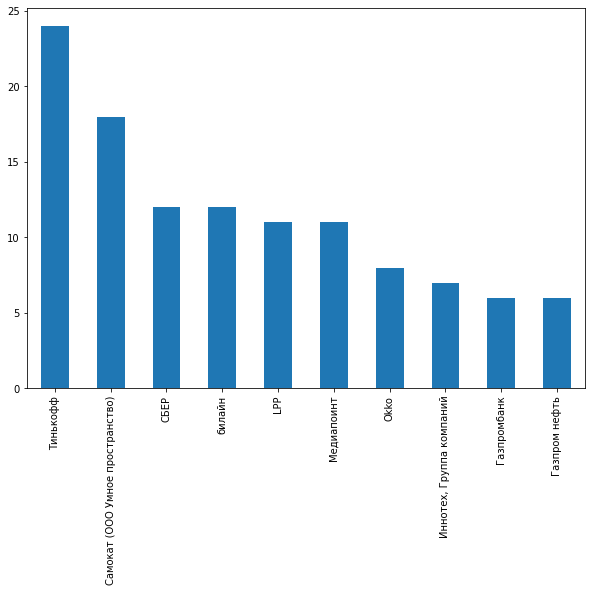

In [21]:
vacancy_df['employer_name'].value_counts().head(10).plot(kind='bar',figsize=(10,7));

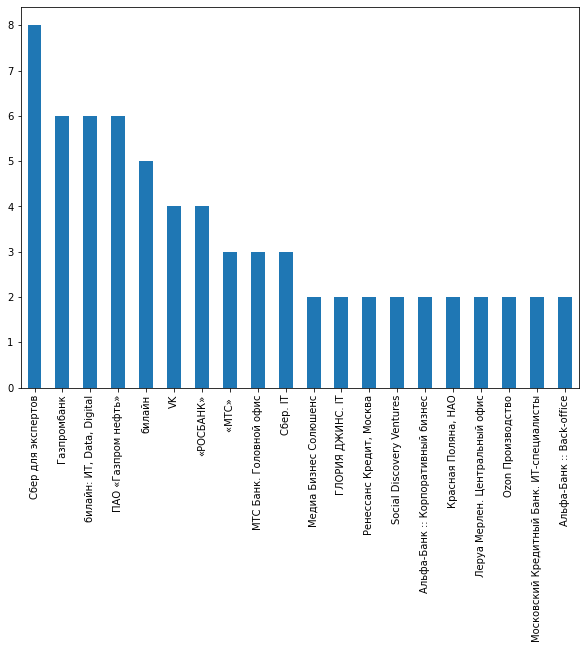

In [22]:
vacancy_df['department_name'].value_counts().head(20).plot(kind='bar', figsize=(10,7));

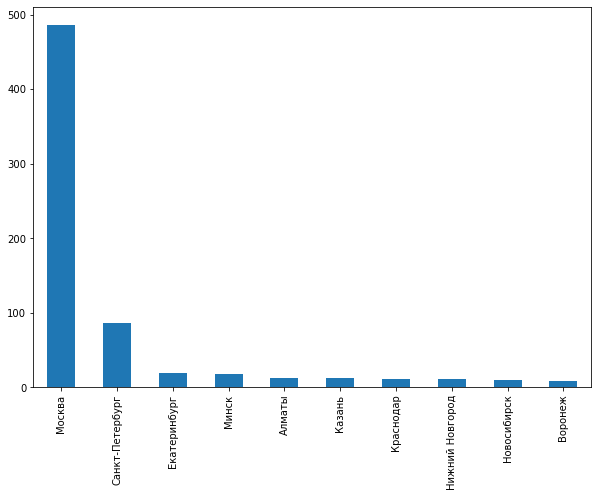

In [23]:
vacancy_df['city'].value_counts().head(10).plot(kind='bar', figsize=(10,7));

### Что с зарплатой?

In [24]:
vacancy_df['salary_from'].isna().value_counts(normalize=True)

True     0.818299
False    0.181701
Name: salary_from, dtype: float64

In [25]:
vacancy_df['salary_to'].isna().value_counts(normalize=True)

True     0.865979
False    0.134021
Name: salary_to, dtype: float64

In [26]:
vacancy_df['salary_currency'].value_counts(normalize=True)

RUR    0.946746
USD    0.029586
KZT    0.011834
EUR    0.011834
Name: salary_currency, dtype: float64

In [27]:
salaries = vacancy_df.query("salary_currency == 'RUR' and experience in ['noExperience', 'between1And3']").groupby(
    ['employer_name', 'department_name']).mean().reset_index()

In [28]:
salaries

,employer_name,department_name,premium,has_test,response_letter_required,archived,accept_temporary,salary_from,salary_to,responses
0,МегаФон,"МегаФон, Офис",0.0,0.0,0.0,0.0,0.0,NaN,60000.0,9.0
1,СБЕР,Сбер для экспертов,0.0,0.0,0.0,0.0,0.0,NaN,250000.0,7.0
2,СБЕР,Сбер. IT,0.0,0.0,0.0,0.0,0.0,100000.0,150000.0,17.0
3,билайн,билайн: B2C,0.0,0.0,0.0,0.0,0.0,45000.0,NaN,249.0


Визуализируем с помощью seaborn

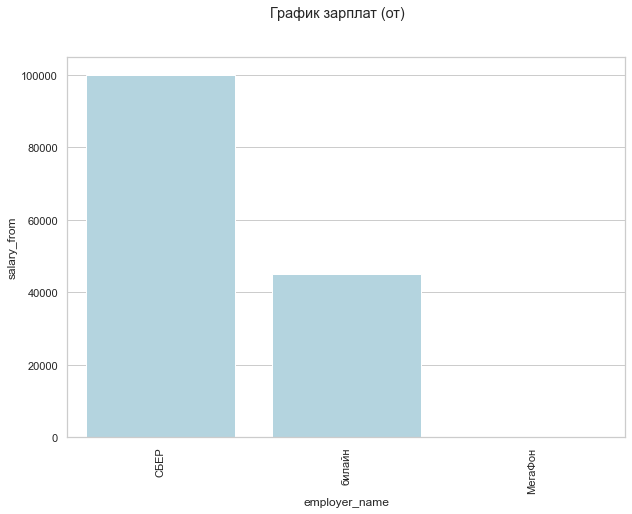

In [29]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10,7))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax);

Удалим пропуски в 'employer_name', 'salary_from' и сделаем небольшой срез для одной компании. Можем привести к нижнему регистру и поискать по имени

In [30]:
vacancy_df.dropna(subset=['employer_name', 'salary_from'])[vacancy_df['employer_name'].str.lower().str.contains('мтс')]

/var/folders/0d/8yvtj3z95_n7sdykg4c63njc1n3vg_/T/ipykernel_32599/3496425526.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vacancy_df.dropna(subset=['employer_name', 'salary_from'])[vacancy_df['employer_name'].str.lower().str.contains('мтс')]


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,adv_response_url,alternate_url,relations,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,responses,city,metro


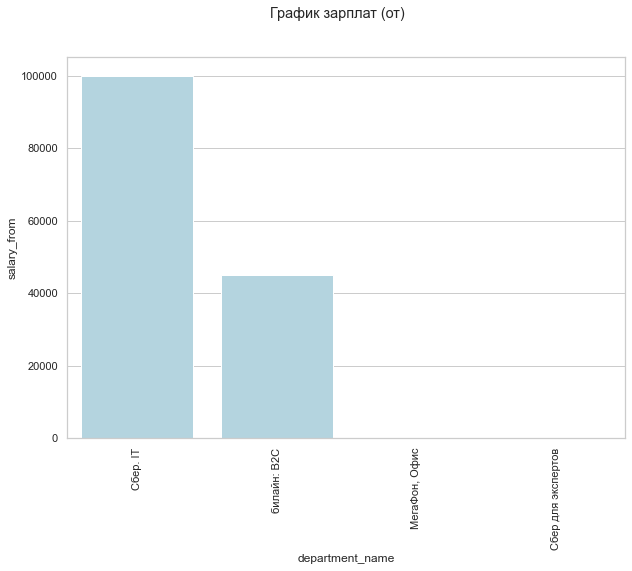

In [31]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10,7))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='department_name', y='salary_from', color='lightblue', ax=ax);

### Давайте поищем вакансии

Сделаем срез по городу **Москва**

In [32]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        776 non-null    object        
 1   premium                   776 non-null    bool          
 2   name                      776 non-null    object        
 3   department                99 non-null     object        
 4   has_test                  776 non-null    bool          
 5   response_letter_required  776 non-null    bool          
 6   area                      776 non-null    object        
 7   salary                    169 non-null    object        
 8   type                      776 non-null    object        
 9   address                   450 non-null    object        
 10  response_url              0 non-null      object        
 11  sort_point_distance       0 non-null      object        
 12  published_at          

In [33]:
city_vacs = vacancy_df[vacancy_df['city'] == "Москва"]

In [34]:
city_vacs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 775
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        486 non-null    object        
 1   premium                   486 non-null    bool          
 2   name                      486 non-null    object        
 3   department                71 non-null     object        
 4   has_test                  486 non-null    bool          
 5   response_letter_required  486 non-null    bool          
 6   area                      486 non-null    object        
 7   salary                    87 non-null     object        
 8   type                      486 non-null    object        
 9   address                   299 non-null    object        
 10  response_url              0 non-null      object        
 11  sort_point_distance       0 non-null      object        
 12  published_at          

In [35]:
city_vacs.head(10)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,adv_response_url,alternate_url,relations,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,responses,city,metro
0,69141517,False,Аналитик данных,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Алтуфьевское шоссе', 'building': '27', 'description': None, 'lat': 55.857503, 'lng': 37.583203, 'raw': 'Москва, Алтуфьевское шоссе, 27', 'metro': None, 'metro_stations': [], 'id': '4551065'}",None,None,2022-08-24,2022-08-24T16:23:42+0300,False,https://hh.ru/applicant/vacancy_response?vacancyId=69141517,None,https://api.hh.ru/vacancies/69141517?host=hh.ru,https://api.hh.ru/vacancies/69141517/adv_response?host=hh.ru,https://hh.ru/vacancy/69141517,[],"{'id': '4968470', 'name': 'МКК Всегда в плюсе', 'url': 'https://api.hh.ru/employers/4968470', 'alternate_url': 'https://hh.ru/employer/4968470', 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/5526481.png', '90': 'https://hhcdn.ru/employer-logo/5526480.png', 'original': 'https://hhcdn.ru/employer-logo-original/976410.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=4968470', 'trusted': True}","{'requirement': 'Знание PostgreSQL. Навыки разработки отчетов/дашбордов средствами Power BI или Excel. Как преимущество: Знание ETL/ELT, принципы построения DWH. ', 'responsibility': 'Ad-hoc запросы. Разработка и построение дашбордов для BI <highlighttext>аналитики</highlighttext> (Power BI). Создание витрин в хранилище. Анализ структуры различных источников...'}",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 1},[],[],[],False,noExperience,МКК Всегда в плюсе,NaN,NaN,NaN,NaN,NaN,1,Москва,NaN
1,39904397,False,Продуктовый аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Головинское шоссе', 'building': '5', 'description': None, 'lat': 55.84024, 'lng': 37.492024, 'raw': 'Москва, Головинское шоссе, 5', 'metro': {'station_name': 'Водный стадион', 'line_name': 'Замоскворецкая', 'station_id': '2.29', 'line_id': '2', 'lat': 55.838978, 'lng': 37.487515}, 'metro_stations': [{'station_name': 'Водный стадион', 'line_name': 'Замоскворецкая', 'station_id': '2.29', 'line_id': '2', 'lat': 55.838978, 'lng': 37.487515}], 'id': '643441'}",None,None,2022-08-24,2022-08-24T14:52:54+0300,False,https://hh.ru/applicant/vacancy_response?vacancyId=39904397,None,https://api.hh.ru/vacancies/39904397?host=hh.ru,https://api.hh.ru/vacancies/39904397/adv_response?host=hh.ru,https://hh.ru/vacancy/39904397,[],"{'id': '78638', 'name': 'Тинькофф', 'url': 'https://api.hh.ru/employers/78638', 'alternate_url': 'https://hh.ru/employer/78638', 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3452962.png', '90': 'https://hhcdn.ru/employer-logo/3452961.png', 'original': 'https://hhcdn.ru/employer-logo-original/753000.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=78638', 'trusted': True}","{'requirement': 'Умение аргументированно отстаивать свою точку зрения. Опыт работы хотя бы с одним из языков программирования (базовые алгоритмы) или знание <highlighttext>SQL</highlighttext>.', 'responsibility': '...гипотез по развитию проектов. Проектировать модель данных и ключевую отчетность на направлении. Самостоятельно выявлять и закрывать потребность команды в <highlighttext>аналитике</highlighttext>.'}",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 4},[],[],[],False,noExperience,Тинькофф,NaN,NaN,NaN,NaN,NaN,4,Москва,Водный стадион
2,69135650,False,Контролер-аналитик,None,False,False,"{'id': '1', 'name': 'Москва'

### Посмотрим содержание вакансий

Сделаем срез вакансий по интересному нам опыту (до 3 лет)

In [36]:
vacs_df = city_vacs.copy().reset_index(drop=True).query("experience in ['noExperience', 'between1And3']")

In [37]:
vacs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 284
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        285 non-null    object        
 1   premium                   285 non-null    bool          
 2   name                      285 non-null    object        
 3   department                46 non-null     object        
 4   has_test                  285 non-null    bool          
 5   response_letter_required  285 non-null    bool          
 6   area                      285 non-null    object        
 7   salary                    50 non-null     object        
 8   type                      285 non-null    object        
 9   address                   181 non-null    object        
 10  response_url              0 non-null      object        
 11  sort_point_distance       0 non-null      object        
 12  published_at          

Выведем адреса

In [38]:
vacs_df['url'].head()

0    https://api.hh.ru/vacancies/69141517?host=hh.ru
1    https://api.hh.ru/vacancies/39904397?host=hh.ru
2    https://api.hh.ru/vacancies/69135650?host=hh.ru
3    https://api.hh.ru/vacancies/36705054?host=hh.ru
4    https://api.hh.ru/vacancies/69128258?host=hh.ru
Name: url, dtype: object

С помощью библиотек json и requests получим нужную информацию, добавим магии и обобразим HTML

In [39]:
HTML(json.loads(requests.get('https://api.hh.ru/vacancies/54738037?host=hh.ru').text)['description'])

Сохраним информацию в читаемом виде

In [40]:
vacs = vacs_df['url'].apply(lambda x: HTML(json.loads(requests.get(x).text)['description']))

In [41]:
vacs[9]

### Добавим кнопки

In [42]:
button1 = widgets.Button(description="Вперед")
button2 = widgets.Button(description="Назад")
output = widgets.Output()

display(button1, button2, output);

counter = -1

def on_clicked1(b):
    with output:
        try:
            global counter
            clear_output()
            counter += 1
            print('№ Вакансии: ', counter)
            metro = 'Не указано' if pd.isna(vacs_df['metro'][counter]) else str(vacs_df['metro'][counter]) 
            display(HTML("<h1>" + str(vacs_df['name'][counter]) + ' в ' + str(vacs_df['employer_name'][counter])))
            display(HTML('Город <b>' + str(vacs_df['city'][counter]) + '</b> Станция метро <b>' + metro + '</b>'))
            display(HTML('Дата публикации <b>' + vacs_df['published_at'][counter].strftime("%d %b %Y") + '</b>'))
            display(HTML('<a href="' + str(vacs_df['alternate_url'][counter]) + '" target="_blank">Ссылка на вакансию</a>'))
            display(vacs[counter])            
        except Exception as e:
            print('Вакансии закончились')    

            
def on_clicked2(b):
    with output:
        try:
            global counter
            clear_output()
            counter -= 1
            if counter < 0: counter = 0
            print('№ Вакансии: ', counter)
            metro = 'Не указано' if pd.isna(vacs_df['metro'][counter]) else str(vacs_df['metro'][counter])
            display(HTML("<h1>" + str(vacs_df['name'][counter]) + ' в ' + str(vacs_df['employer_name'][counter])))
            display(HTML('Город <b>' + str(vacs_df['city'][counter]) + '</b> Станция метро <b>' + metro + '</b>'))
            display(HTML('Дата публикации <b>' + vacs_df['published_at'][counter].strftime("%d %b %Y") + '</b>'))
            display(HTML('<a href="' + str(vacs_df['alternate_url'][counter]) + '" target="_blank">Ссылка на вакансию</a>'))
            display(vacs[counter])            
        except Exception as e:
            print('Вакансии закончились')                
            
button1.on_click(on_clicked1)
button2.on_click(on_clicked2)  

Button(description='Вперед', style=ButtonStyle())

Button(description='Назад', style=ButtonStyle())

Output()

С помощью библиотеки BeautifulSoup извлечем данные из HTML

In [43]:
from bs4 import BeautifulSoup

долго грузит данные, отключил

In [44]:
#vacs2 = vacs_df['url'].apply(lambda x: BeautifulSoup(json.loads(requests.get(x).text)['description']).get_text())

In [45]:
#vacs2[3]